In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
from citipy import citipy

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

614

In [10]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [12]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | tuatapere
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | mahebourg
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | lieto
Processing Record 8 of Set 1 | oriximina
Processing Record 9 of Set 1 | mar del plata
Processing Record 10 of Set 1 | sivaki
Processing Record 11 of Set 1 | port elizabeth
Processing Record 12 of Set 1 | khatanga
Processing Record 13 of Set 1 | torbay
Processing Record 14 of Set 1 | vilyuysk
Processing Record 15 of Set 1 | vardo
Processing Record 16 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 17 of Set 1 | itarema
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | tabarqah
City not found. Skipping...
Processing Record 20 of Set 1 | ribeira grande
Processing Record 21 of Set 1 | east london
Processing Record 22 of Set 1 | miyako
Processing Record 23 of Set 1 | 

Processing Record 40 of Set 4 | shubarkuduk
Processing Record 41 of Set 4 | maloyaz
City not found. Skipping...
Processing Record 42 of Set 4 | vila franca do campo
Processing Record 43 of Set 4 | padang
Processing Record 44 of Set 4 | hit
Processing Record 45 of Set 4 | samarai
Processing Record 46 of Set 4 | upernavik
Processing Record 47 of Set 4 | port-de-paix
City not found. Skipping...
Processing Record 48 of Set 4 | mackay
Processing Record 49 of Set 4 | haines junction
Processing Record 50 of Set 4 | qaanaaq
Processing Record 1 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 2 of Set 5 | hithadhoo
Processing Record 3 of Set 5 | chokurdakh
Processing Record 4 of Set 5 | chuy
Processing Record 5 of Set 5 | viedma
Processing Record 6 of Set 5 | kodiak
Processing Record 7 of Set 5 | igrim
Processing Record 8 of Set 5 | chalala
Processing Record 9 of Set 5 | vestmannaeyjar
Processing Record 10 of Set 5 | zyryanskoye
Processing Record 11 of Set 5 | sao joao da b

Processing Record 27 of Set 8 | tazmalt
Processing Record 28 of Set 8 | tiruvannamalai
Processing Record 29 of Set 8 | katsuura
Processing Record 30 of Set 8 | puerto suarez
Processing Record 31 of Set 8 | broken hill
Processing Record 32 of Set 8 | port blair
Processing Record 33 of Set 8 | oussouye
Processing Record 34 of Set 8 | laguna
Processing Record 35 of Set 8 | sistranda
Processing Record 36 of Set 8 | moree
Processing Record 37 of Set 8 | maple creek
Processing Record 38 of Set 8 | nabire
Processing Record 39 of Set 8 | oranjestad
Processing Record 40 of Set 8 | mastic beach
Processing Record 41 of Set 8 | nioro
Processing Record 42 of Set 8 | roverud
Processing Record 43 of Set 8 | cap malheureux
Processing Record 44 of Set 8 | saleaula
City not found. Skipping...
Processing Record 45 of Set 8 | vostok
Processing Record 46 of Set 8 | khingansk
Processing Record 47 of Set 8 | arang
Processing Record 48 of Set 8 | scottsburgh
City not found. Skipping...
Processing Record 49 of

Processing Record 16 of Set 12 | benton
Processing Record 17 of Set 12 | comodoro rivadavia
Processing Record 18 of Set 12 | barahona
Processing Record 19 of Set 12 | griffith
Processing Record 20 of Set 12 | porto novo
Processing Record 21 of Set 12 | mizdah
Processing Record 22 of Set 12 | moussoro
Processing Record 23 of Set 12 | grindavik
Processing Record 24 of Set 12 | talcahuano
Processing Record 25 of Set 12 | dudinka
Processing Record 26 of Set 12 | canakkale
Processing Record 27 of Set 12 | amarante do maranhao
Processing Record 28 of Set 12 | brae
Processing Record 29 of Set 12 | santa rosa
Processing Record 30 of Set 12 | san miguelito
Processing Record 31 of Set 12 | xai-xai
Processing Record 32 of Set 12 | fortuna
Processing Record 33 of Set 12 | trairi
Processing Record 34 of Set 12 | da lat
Processing Record 35 of Set 12 | mundi
Processing Record 36 of Set 12 | juneau
Processing Record 37 of Set 12 | sinnamary
Processing Record 38 of Set 12 | hirara
Processing Record 39

In [13]:
len(city_data)

563

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hermanus,-34.4187,19.2345,71.80,59,2,25.52,ZA,2022-11-10 15:00:09
1,Tuatapere,-46.1333,167.6833,48.78,81,0,3.69,NZ,2022-11-10 15:00:09
2,Cape Town,-33.9258,18.4232,77.34,49,0,8.99,ZA,2022-11-10 15:00:10
3,Puerto Ayora,-0.7393,-90.3518,69.55,83,95,4.00,EC,2022-11-10 15:00:11
4,Mahebourg,-20.4081,57.7000,76.24,74,6,10.76,MU,2022-11-10 15:00:12
5,Punta Arenas,-53.1500,-70.9167,50.11,34,3,7.07,CL,2022-11-10 15:00:13
6,Lieto,60.5103,22.4618,49.21,87,100,9.22,FI,2022-11-10 15:00:15
7,Oriximina,-1.7656,-55.8661,92.08,46,82,5.19,BR,2022-11-10 15:00:16
8,Mar Del Plata,-38.0023,-57.5575,75.22,83,75,16.11,AR,2022-11-10 14:58:54
9,Sivaki,52.6333,126.7500,11.59,88,4,3.11,RU,2022-11-10 15:00:17


In [15]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", 'Wind Speed']
city_data_df = city_data_df[new_column_order]

In [16]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hermanus,ZA,2022-11-10 15:00:09,-34.4187,19.2345,71.80,59,2,25.52
1,Tuatapere,NZ,2022-11-10 15:00:09,-46.1333,167.6833,48.78,81,0,3.69
2,Cape Town,ZA,2022-11-10 15:00:10,-33.9258,18.4232,77.34,49,0,8.99
3,Puerto Ayora,EC,2022-11-10 15:00:11,-0.7393,-90.3518,69.55,83,95,4.00
4,Mahebourg,MU,2022-11-10 15:00:12,-20.4081,57.7000,76.24,74,6,10.76
5,Punta Arenas,CL,2022-11-10 15:00:13,-53.1500,-70.9167,50.11,34,3,7.07
6,Lieto,FI,2022-11-10 15:00:15,60.5103,22.4618,49.21,87,100,9.22
7,Oriximina,BR,2022-11-10 15:00:16,-1.7656,-55.8661,92.08,46,82,5.19
8,Mar Del Plata,AR,2022-11-10 14:58:54,-38.0023,-57.5575,75.22,83,75,16.11
9,Sivaki,RU,2022-11-10 15:00:17,52.6333,126.7500,11.59,88,4,3.11


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

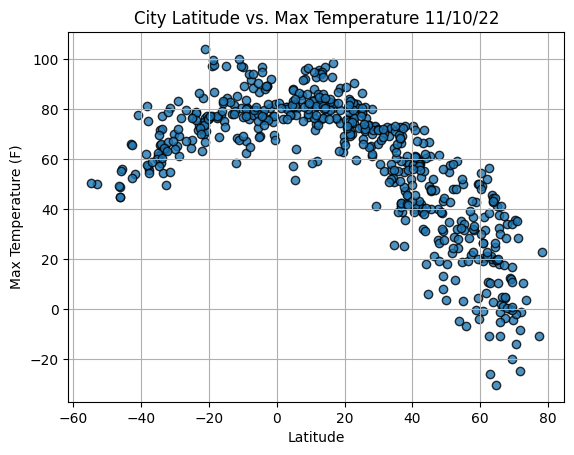

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

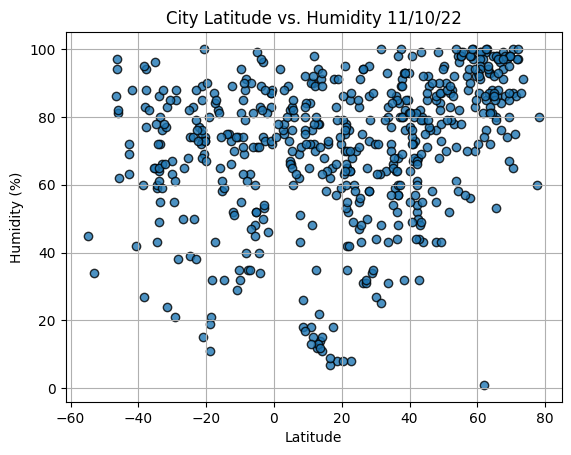

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

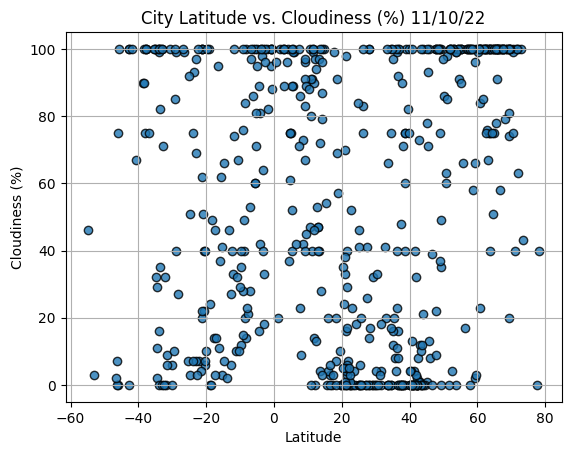

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

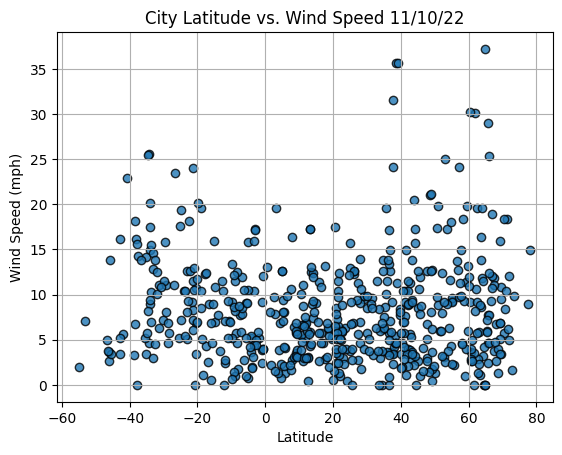

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [23]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [24]:
index13 = city_data_df.loc[13]

In [25]:
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3      False
4      False
       ...  
558     True
559    False
560    False
561     True
562     True
Name: Lat, Length: 563, dtype: bool

In [26]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
6,Lieto,FI,2022-11-10 15:00:15,60.5103,22.4618,49.21,87,100,9.22
9,Sivaki,RU,2022-11-10 15:00:17,52.6333,126.7500,11.59,88,4,3.11
11,Khatanga,RU,2022-11-10 15:00:18,71.9667,102.5000,-0.96,97,100,12.10
12,Torbay,CA,2022-11-10 15:00:19,47.6666,-52.7314,40.28,76,100,3.00
13,Vilyuysk,RU,2022-11-10 15:00:20,63.7553,121.6247,18.82,93,100,8.63


In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

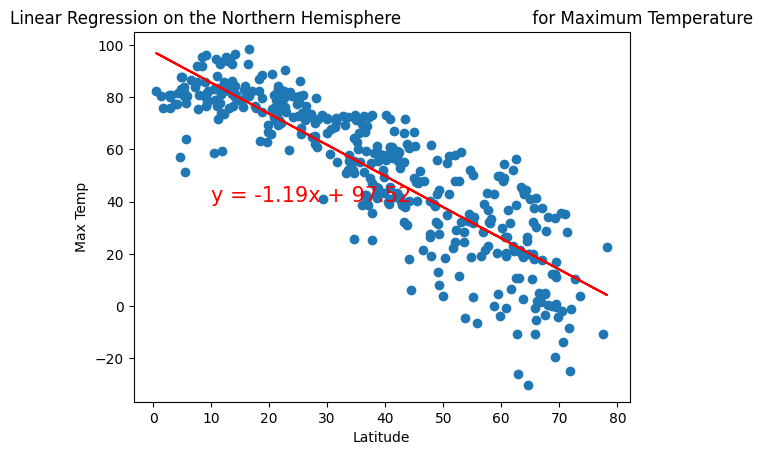

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

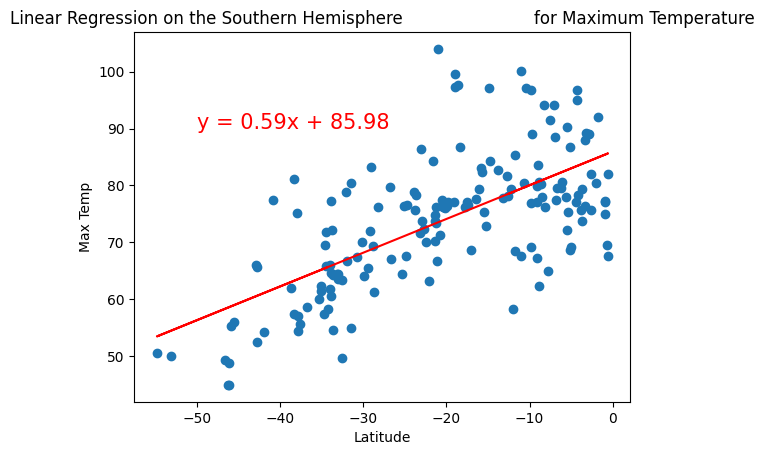

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

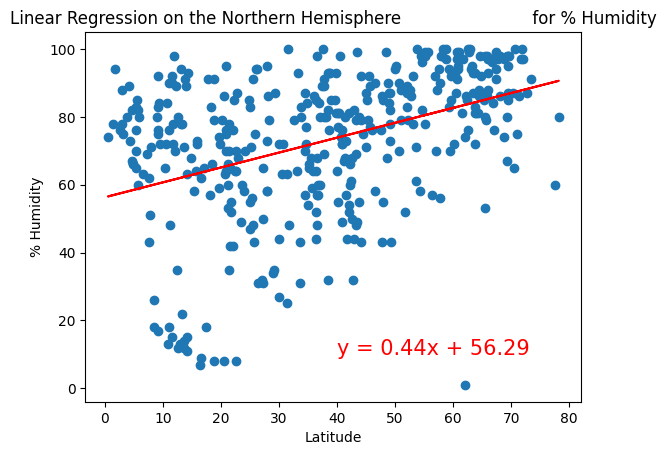

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

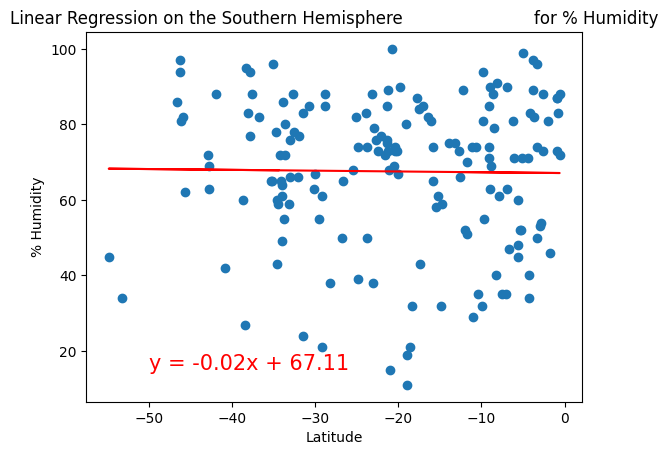

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

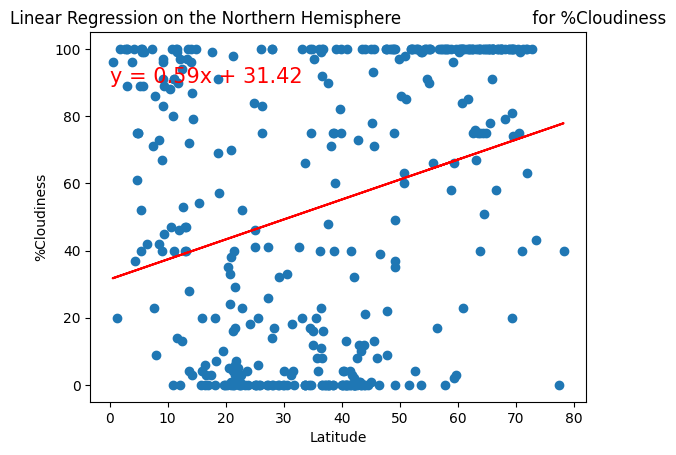

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for %Cloudiness', '%Cloudiness',(0,90))

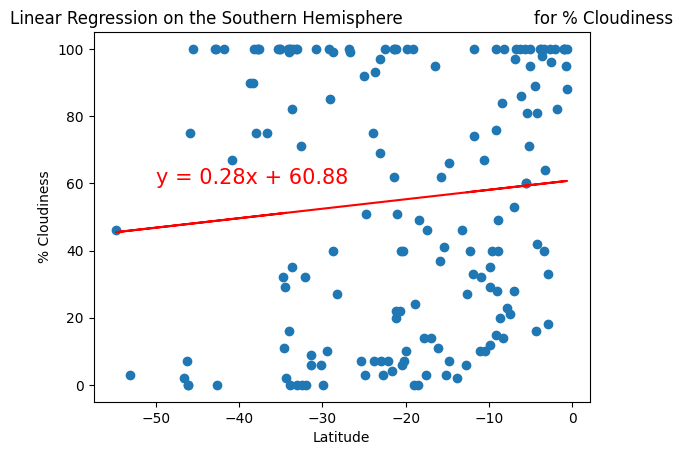

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

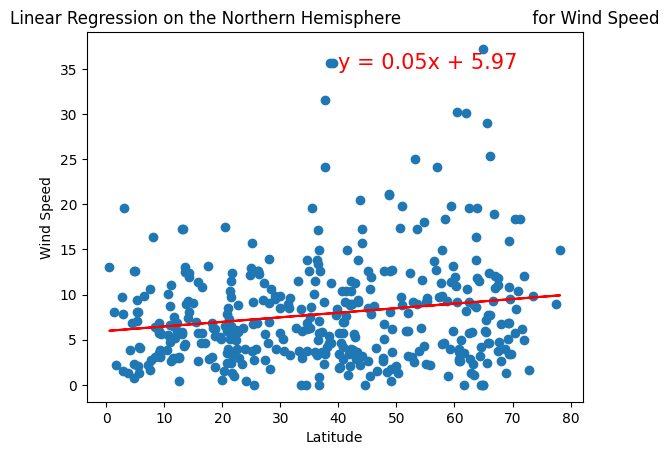

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

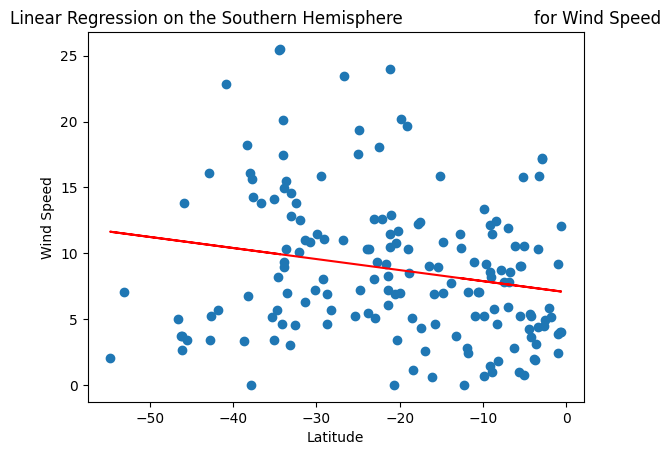

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))